# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

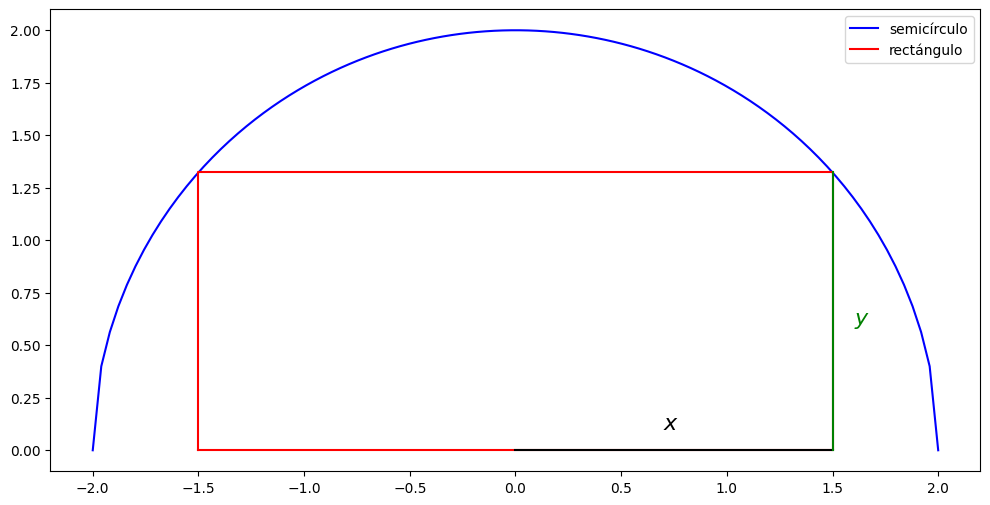

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

**Solución:**

Se desea encontrar el área máxima del rectángulo, esto es $A_R=bh$, pero la base $b=2x$ y la altura $h=y$, por lo que
$$
\max A_R=\max2xy.
$$
Sabemos que el rectángulo está inscrito en un semicírculo de radio 2, entonces la distancia del origen al vértice del rectángulo es siempre 2, es decir $y=\sqrt{2^2-x^2}$, sustituyendo en la expresión del área, resulta
$$
\max_xA_R=\max_x2x\sqrt{2^2-x^2},
$$
donde $0<x<2$.

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [3]:
import sympy as sym
import numpy as np

In [4]:
sym.var('x')
def AR(x):
  return 2*x*(4-x**2)**0.5
AR(x)

2*x*(4 - x**2)**0.5

In [5]:
dA=sym.diff(AR(x),x)
c=sym.solve(dA,x)
c

[-1.41421356237310, 1.41421356237310]

In [7]:
c[1] # 'x' óptima

1.41421356237310

In [9]:
ddA=sym.diff(dA,x)
ddA.subs(x,c[1]) # Se trata de un máximo

-8.00000000000000

In [10]:
AR(c[1]) # Área máxima

4.00000000000000

**Respuesta:** El área máxima de un rectángulo inscrito en un semicírculo de radio 2 es 4.

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [11]:
# Base
2*c[1]

2.82842712474619

In [12]:
# Altura
(4-c[1]**2)**0.5

1.41421356237309

**Respuesta:** Las dimensiones óptima para maximizar el área son $b=2.8284$ y $h=1.4142$.

---

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Respuesta:**

Se desea minimizar la suma de trabajadores que comienzan su jornada laboral cada día, esto es:
$$
\min x_1+x_2+x_3+x_4+x_5+x_6+x_7.
$$

Para satisfacer la condición del mínimo de trabajadores en cada día, sumamos los trabajadores que aún satisfacen su jornada de cinco días, es decir:
* Lunes: $x_1+x_4+x_5+x_6+x_7\geq14$
* Martes: $x_1+x_2+x_5+x_6+x_7\geq13$
* Miércoles: $x_1+x_2+x_3+x_6+x_7\geq15$
* Jueves: $x_1+x_2+x_3+x_4+x_7\geq16$
* Viernes: $x_1+x_2+x_3+x_4+x_5\geq19$
* Sábado: $x_2+x_3+x_4+x_5+x_6\geq18$
* Domingo: $x_3+x_4+x_5+x_6+x_7\geq11$

O de otra forma
* Lunes: $-(x_1+x_4+x_5+x_6+x_7)\leq-14$
* Martes: $-(x_1+x_2+x_5+x_6+x_7)\leq-13$
* Miércoles: $-(x_1+x_2+x_3+x_6+x_7)\leq-15$
* Jueves: $-(x_1+x_2+x_3+x_4+x_7)\leq-16$
* Viernes: $-(x_1+x_2+x_3+x_4+x_5)\leq-19$
* Sábado: $-(x_2+x_3+x_4+x_5+x_6)\leq-18$
* Domingo: $-(x_3+x_4+x_5+x_6+x_7)\leq-11$

In [13]:
import scipy.optimize as opt

In [15]:
c=np.array([1,1,1,1,1,1,1])
A=np.array([[-1, 0, 0,-1,-1,-1,-1],  # Lunes
            [-1,-1, 0, 0,-1,-1,-1],  # Martes
            [-1,-1,-1, 0, 0,-1,-1],  # Miércoles
            [-1,-1,-1,-1, 0, 0,-1],  # Jueves
            [-1,-1,-1,-1,-1, 0, 0],  # Viernes
            [ 0,-1,-1,-1,-1,-1, 0],  # Sábado
            [ 0, 0,-1,-1,-1,-1,-1]]) # Domingo
b=np.array([-14,-13,-15,-16,-19,-18,-11])

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [ ]:
opt.linprog(c,A,b)

**Respuesta:** Se necesitan 22 trabajadores en total. Se consigue si 4 trabajadores inician en lunes y jueves; 3 en martes, viernes y sábado; y 5 trabajadores inician el miércoles.

---

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [18]:
import pandas as pd

In [19]:
archivo='/content/drive/MyDrive/Colab Notebooks/ITESO/SimMat/SimMat_P2024/Módulo 1 - Optimización/Salarios_minimos.csv'

In [20]:
datos=pd.read_csv(archivo)
datos.head() # Muestra los primeros cinco renglones

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

In [21]:
import matplotlib.pyplot as plt

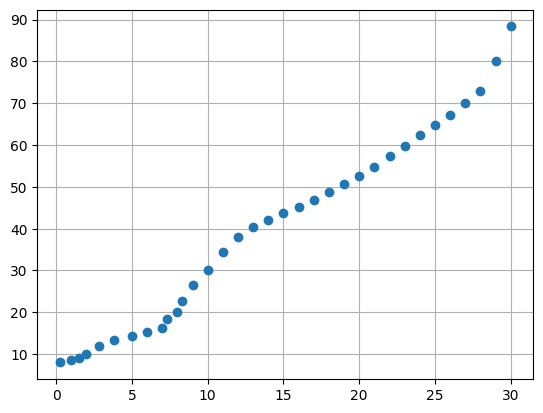

In [22]:
x=datos['Periodo']-1988
y=datos['Salario']
plt.plot(x,y,'o')
plt.grid()

In [23]:
def error(B,x,y):
  n=len(B)
  X=np.array([x**i for i in range(n)])
  f=np.dot(B,X)
  return np.sum((f-y)**2)

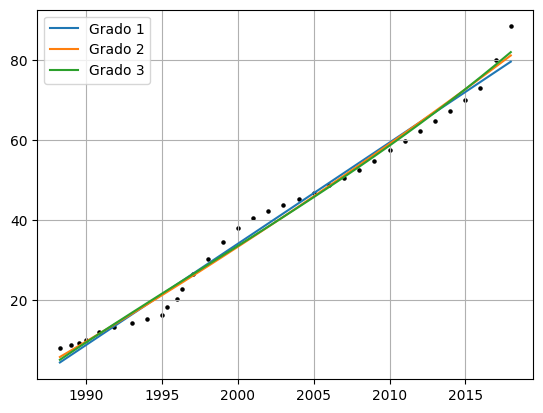

In [27]:
sol=[]
plt.scatter(x+1988,y,s=5,c='k')
for n in range(1,4): # n toma los valores de 1,2 y 3 (el 4 lo excluye)
  B_inicial=np.random.rand(n+1)
  sol.append(opt.minimize(error,B_inicial,args=(x,y)))
  X=np.array([x**i for i in range(n+1)])
  f=np.dot(sol[-1].x,X)
  plt.plot(x+1988,f,label='Grado '+str(n))
plt.legend()
plt.grid()

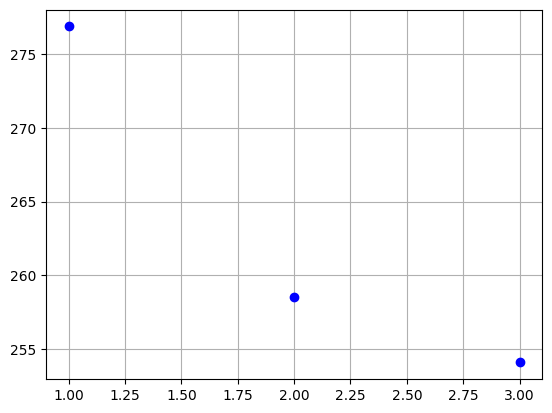

In [25]:
for n in range(3):
  plt.plot(n+1,sol[n].fun,'ob')
plt.grid()

**Respuesta:** El polinomio que mejor se ajusta es el de grado 3 ya que tiene menor error cuadrático acumulado, sin embargo, la mejoría del error entre el polinomio de grado 2 y de grado 3 no es significativa.

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [36]:
x=2019-1988
for n in range(1,4):
  X=np.array([x**i for i in range(n+1)])
  f=np.dot(sol[n-1].x,X)
  print("La proyección al año {} usando el polinomio de grado {} es {}.".format(x+1988,n,f))

La proyección al año 2019 usando el polinomio de grado 1 es 82.09377161620347.
La proyección al año 2019 usando el polinomio de grado 2 es 83.97212208681925.
La proyección al año 2019 usando el polinomio de grado 3 es 85.18604989721288.
